# Bike Sharing Demand Prediction

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn import linear_model
LinearRegression = linear_model.LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from datetime import datetime

#Fixed random_seed for using as random_state for reproducibility
RANDOM_SEED = 12012001 #My birthday, 12th January 2001
MAX_ITERATIONS = 100000

In [2]:
#Dataset taken from https://www.kaggle.com/datasets/chaudhariabhishek/boombikes-dataset
df = pd.read_csv('bikes.csv'); df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True); df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
print("Number of nulls:"); print(df.isnull().sum())
print("Number of duplicated data:", df.duplicated().sum())

Number of nulls:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Number of duplicated data: 0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [7]:
print("Season values:"); print(df['season'].value_counts())

Season values:
3    188
2    184
1    180
4    178
Name: season, dtype: int64


In [8]:
#Season names
SEASON_NAMES = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}

In [9]:
print("Month values:"); print(df['mnth'].value_counts())

Month values:
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64


In [10]:
#Month names:
MONTH_NAMES = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

In [11]:
print("Weekday values:"); print(df['weekday'].value_counts())

Weekday values:
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64


In [12]:
print(df['dteday'][0])

2018-01-01 00:00:00


In [13]:
print(datetime(2018, 1, 1).strftime("%A"))

Monday


In [14]:
print(df['weekday'][0])

6


The dataset uses 6 for Monday, so 0 for Tuesday, 1 for Wednesday, etc.

In [15]:
#Weekday names
WEEKDAY_NAMES = {
    6: 'Mon',
    0: 'Tue',
    1: 'Wed',
    2: 'Thu',
    3: 'Fri',
    4: 'Sat',
    5: 'Sun'
}

In [16]:
#Holidays and working days are in actuality boolean values.
print("Holiday values:"); print(df['holiday'].value_counts())
print("Working day values:"); print(df['workingday'].value_counts())

Holiday values:
0    709
1     21
Name: holiday, dtype: int64
Working day values:
1    499
0    231
Name: workingday, dtype: int64


In [17]:
#Weather situation values
print("Weather situation values:"); print(df['weathersit'].value_counts())

Weather situation values:
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [18]:
#weathersit -> weather condition names
WEATHERSIT_NAMES = {
    1: 'Clear/Few Clouds/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Heavy Rain/Light Snow'
}

## Data Visualization

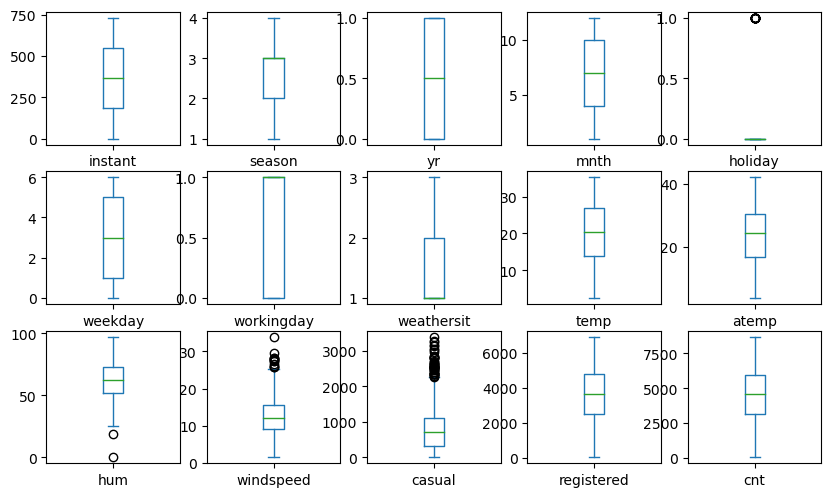

In [19]:
df.plot(kind='box', layout=(5, 5), subplots=True, figsize=(10, 10))
plt.show()

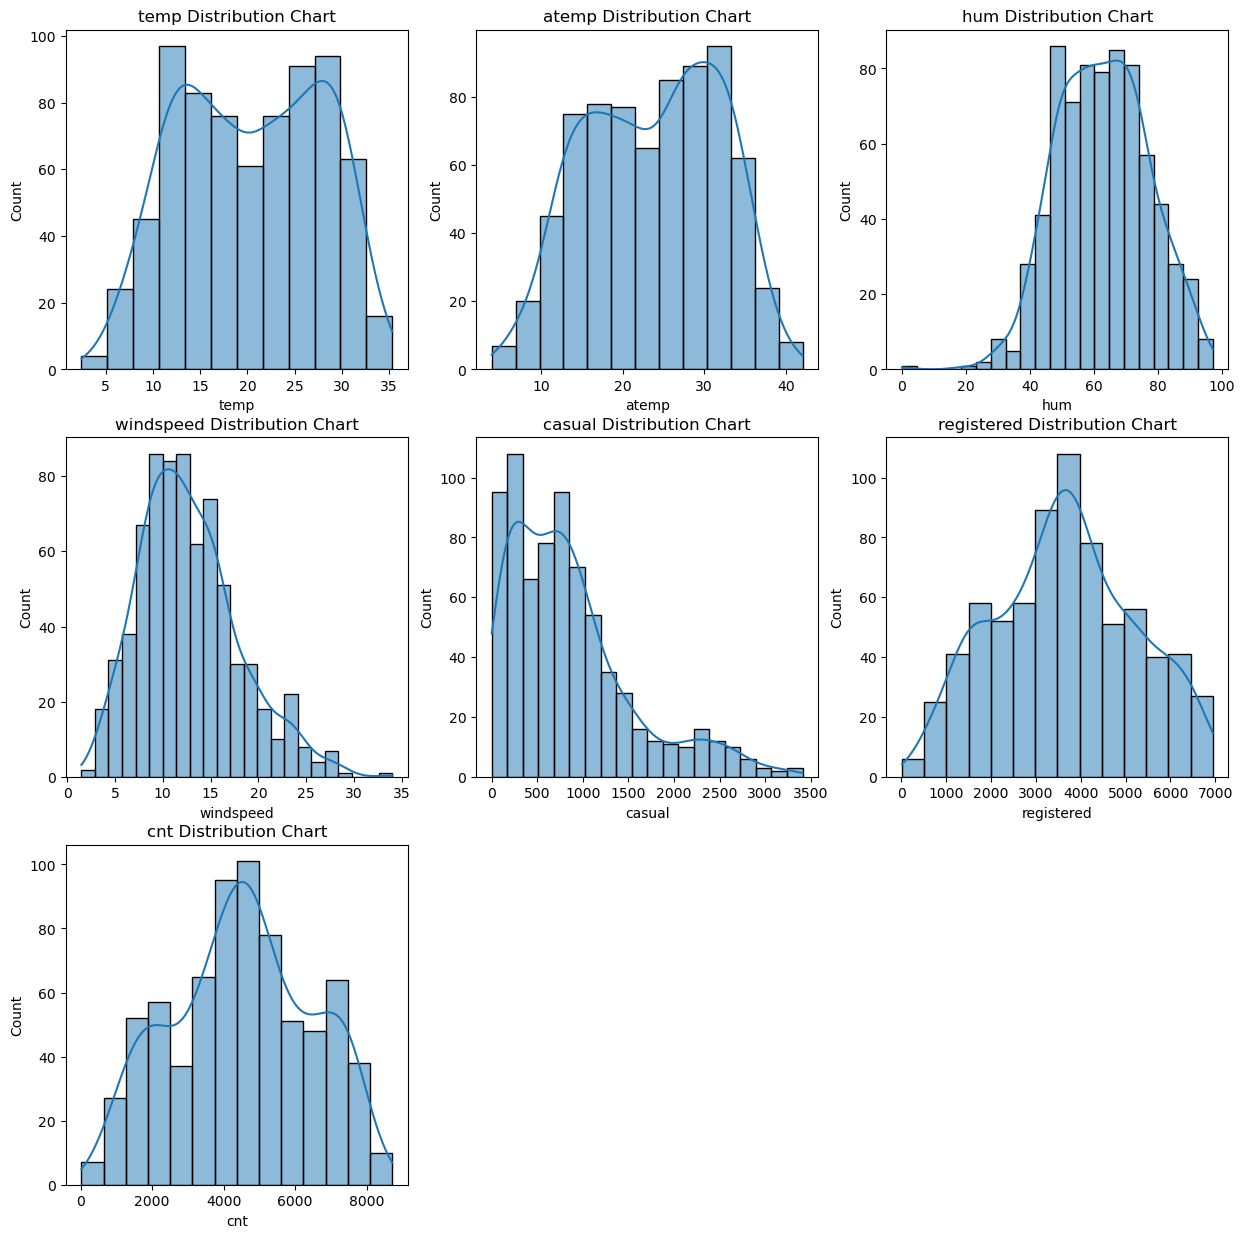

In [20]:
#Distributions of numerical physical quantities observed
NUMERICAL_COLS = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(15, 15))
for i in range(len(NUMERICAL_COLS)):
    col = NUMERICAL_COLS[i]
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title('%s Distribution Chart' % col)
plt.show()

Some of the variables cannot be scaled (transformed) during preprocessing to standard normal distributions because they are multimodal.

In [21]:
#In the dataset, for each row, casual + registered = cnt. Is it true for all data?
((df['casual'] + df['registered']) == df['cnt']).all()

True

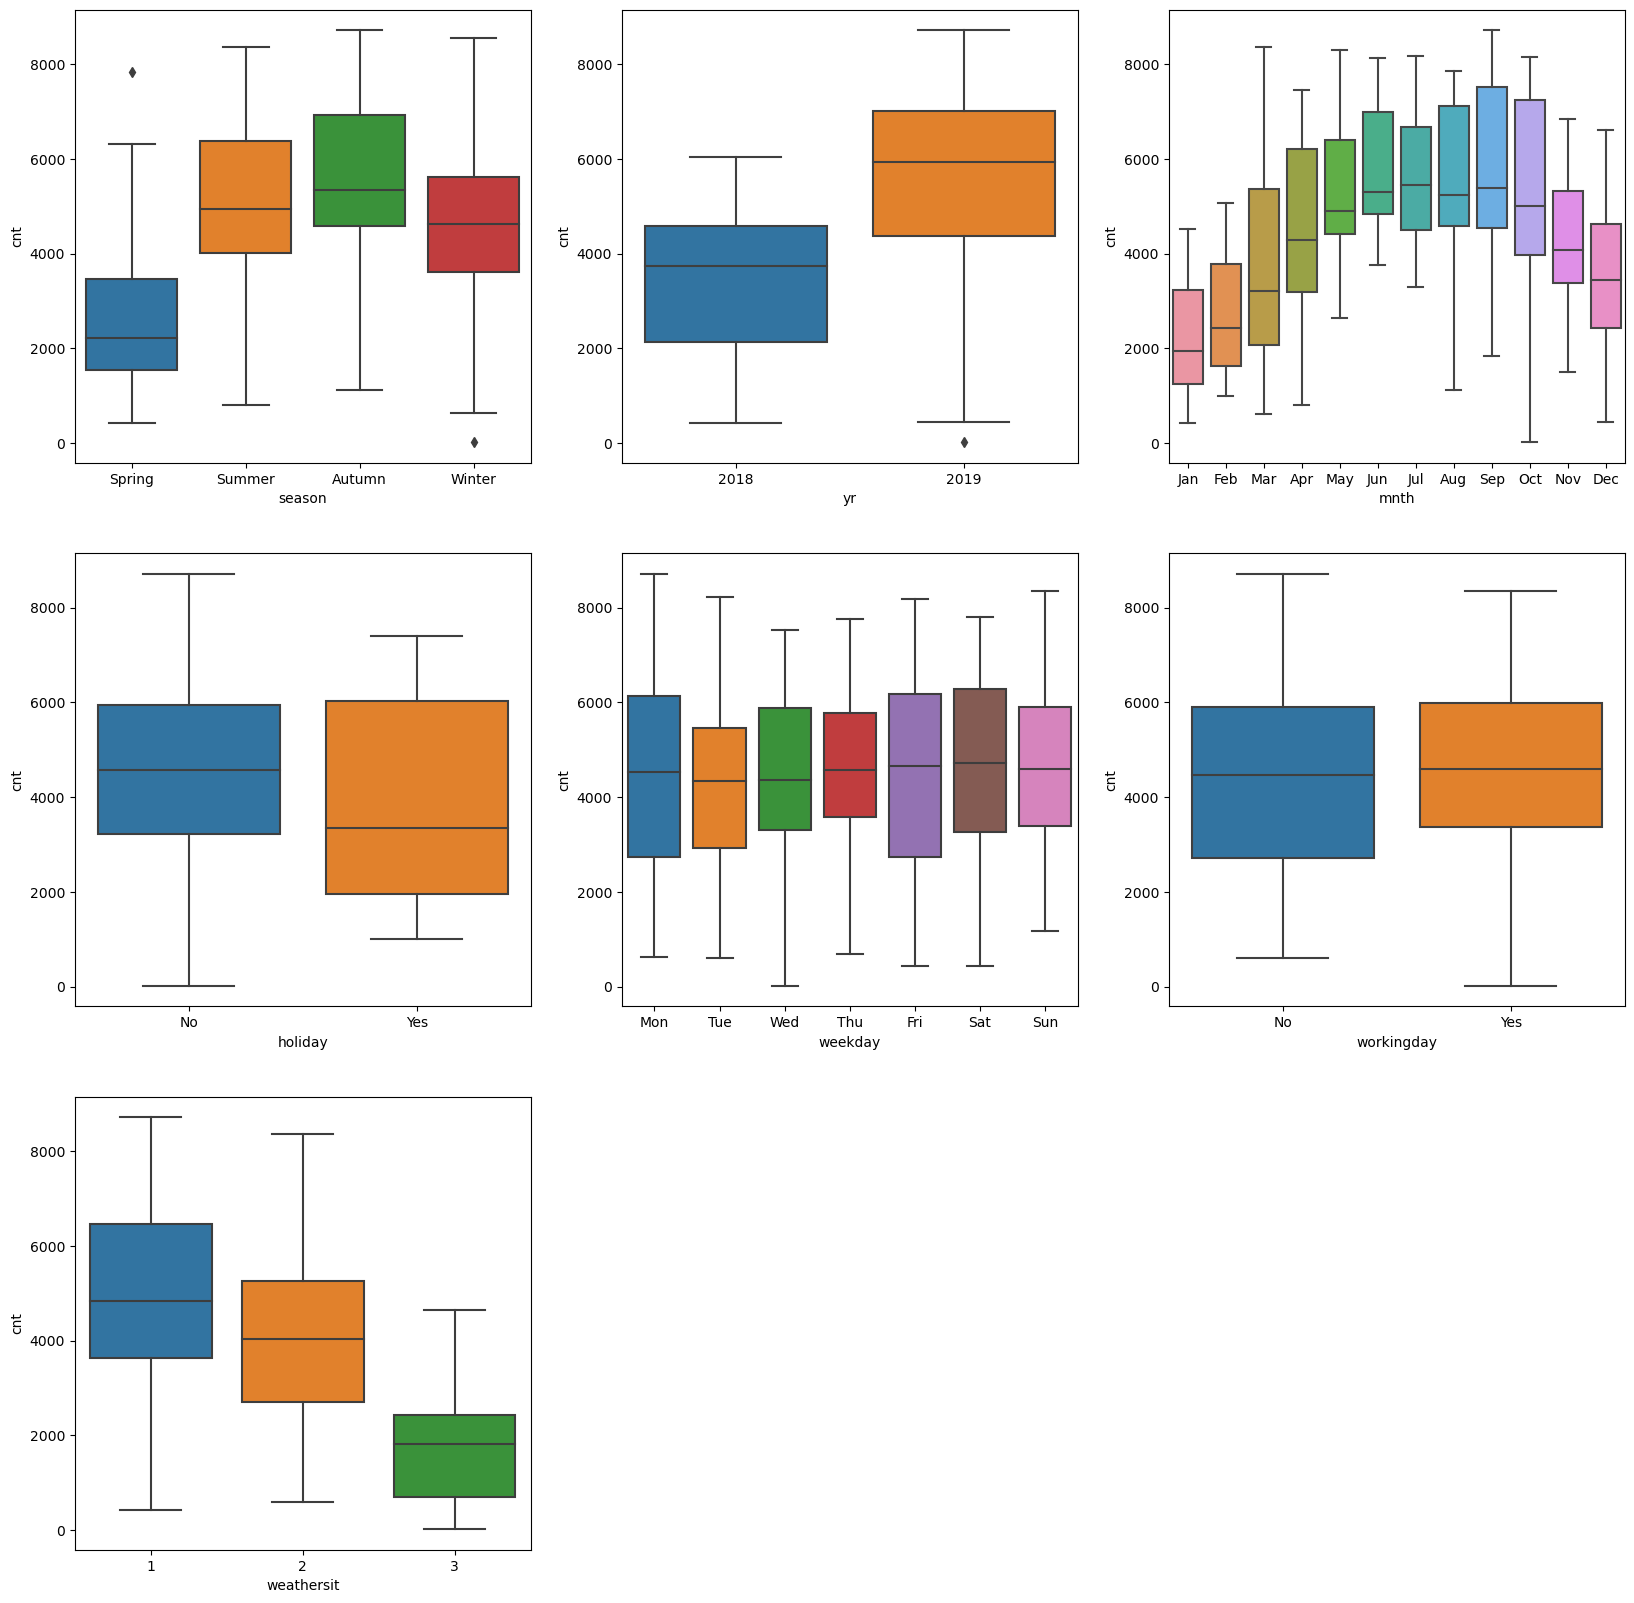

In [22]:
CATEGORICAL_COLS = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

df2 = df.copy()
df2['season'] = df2['season'].replace(SEASON_NAMES)
df2['yr'] = df2['yr'].replace({0: 2018, 1: 2019}) #from looking at the dataset
df2['mnth'] = df2['mnth'].replace(MONTH_NAMES)
df2['weekday'] = df2['weekday'].replace(WEEKDAY_NAMES)
#df2['weathersit'] = df2['weathersit'].replace(WEATHERSIT_NAMES)
df2['holiday'] = df2['holiday'].replace({0: 'No', 1: 'Yes'})
df2['workingday'] = df2['workingday'].replace({0: 'No', 1: 'Yes'})

plt.figure(figsize=(20, 20))
for i in range(len(CATEGORICAL_COLS)):
    col = CATEGORICAL_COLS[i]
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=col, y='cnt', data=df2)

plt.show() #; del df2

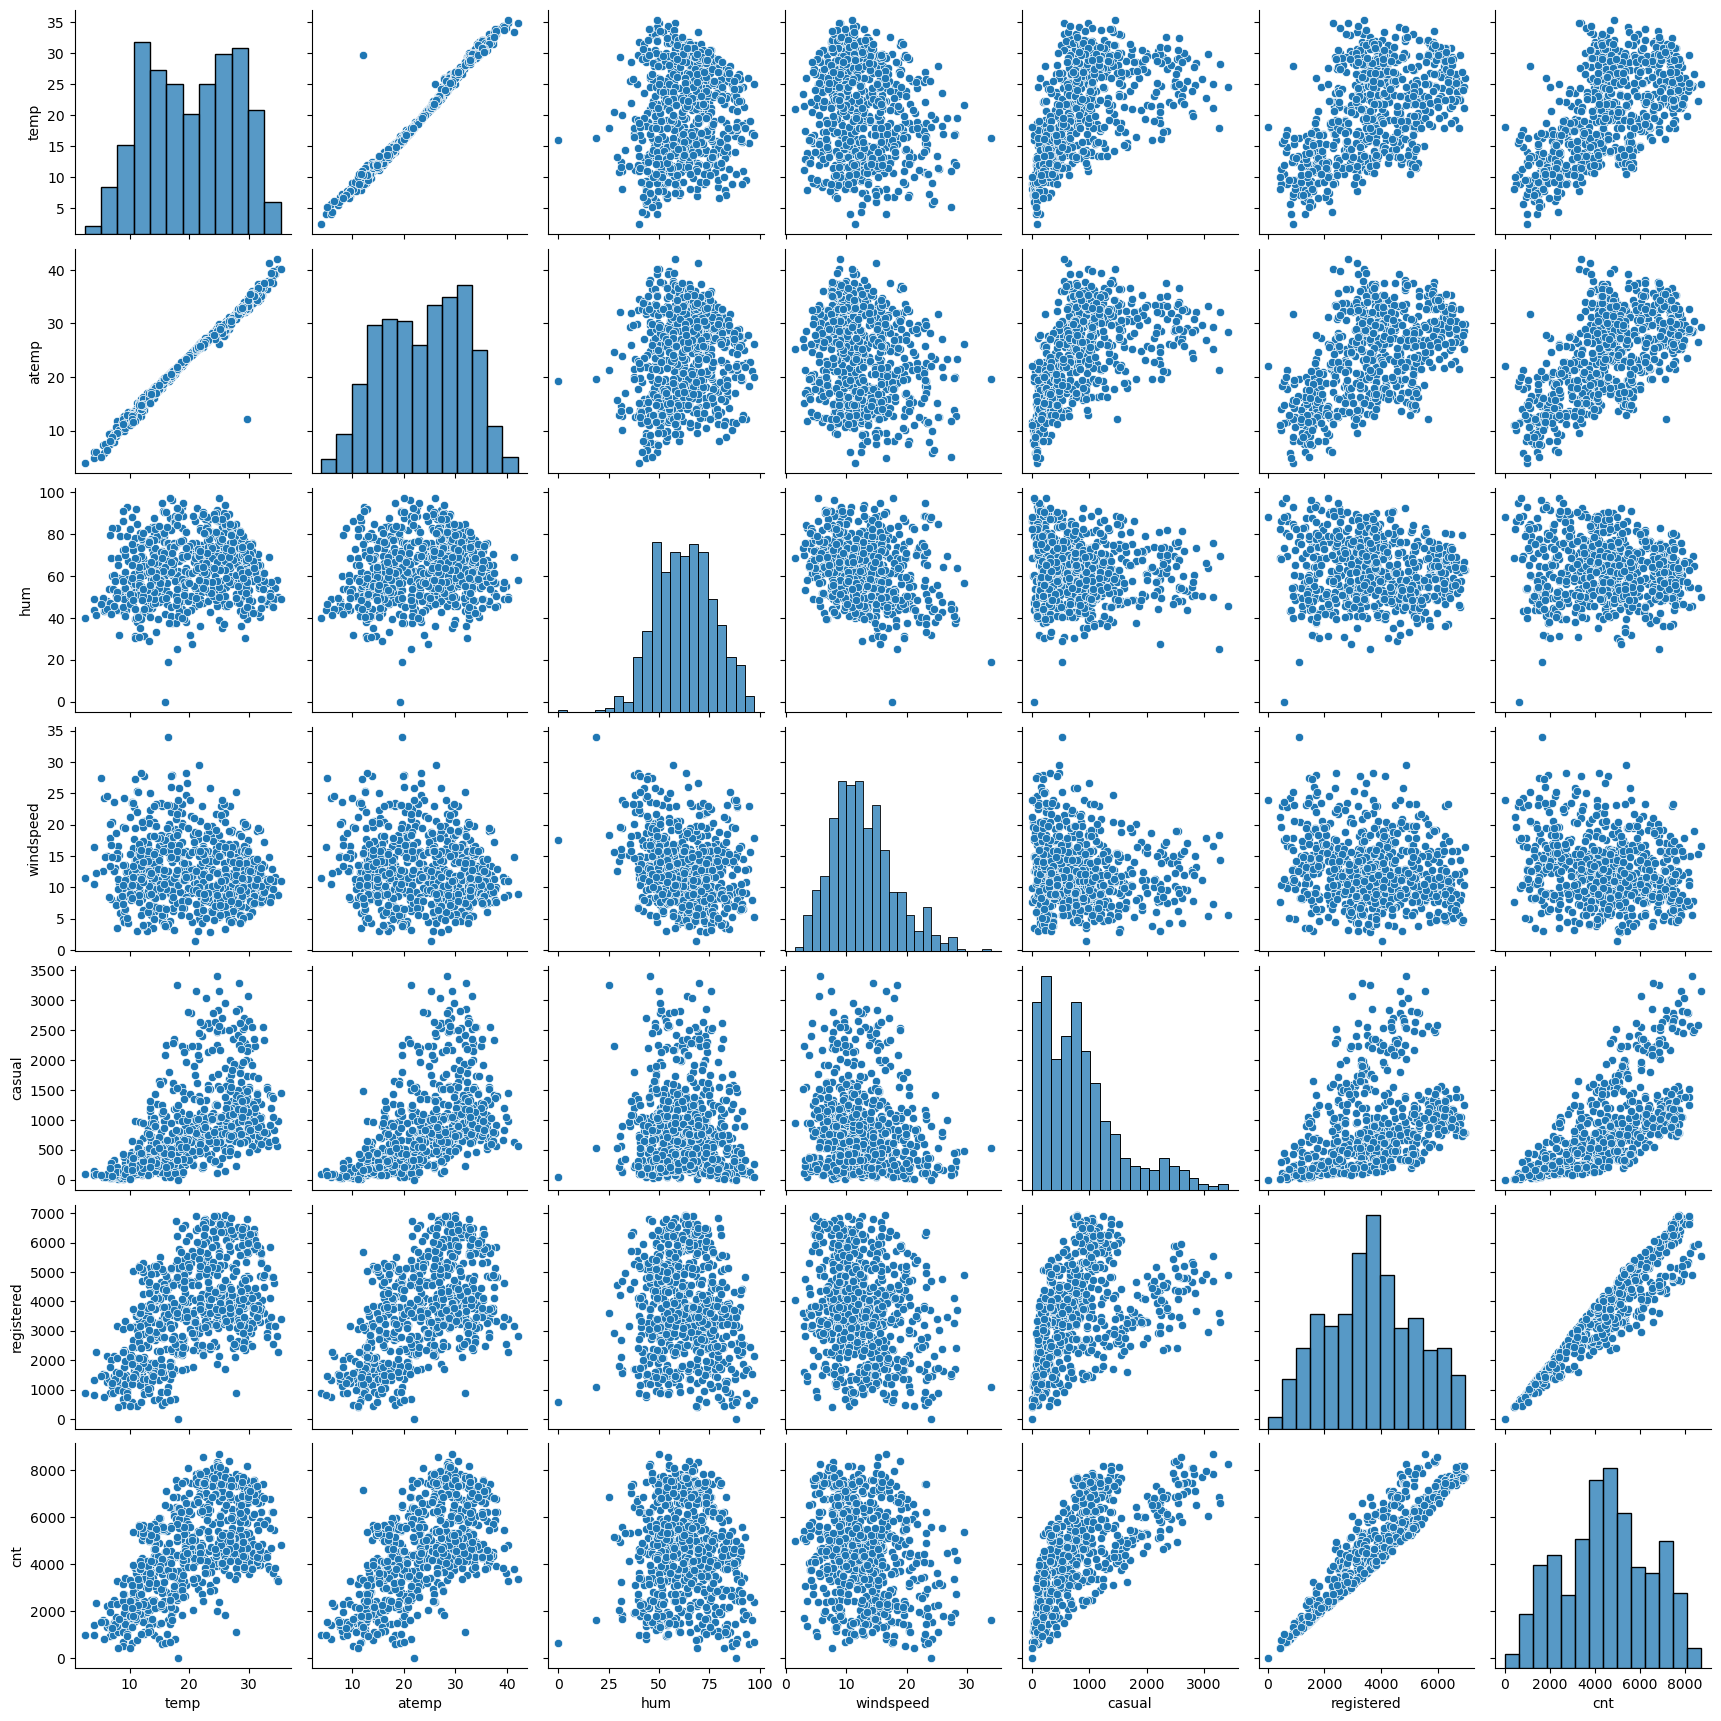

In [23]:
sns.pairplot(df[NUMERICAL_COLS]); plt.show()

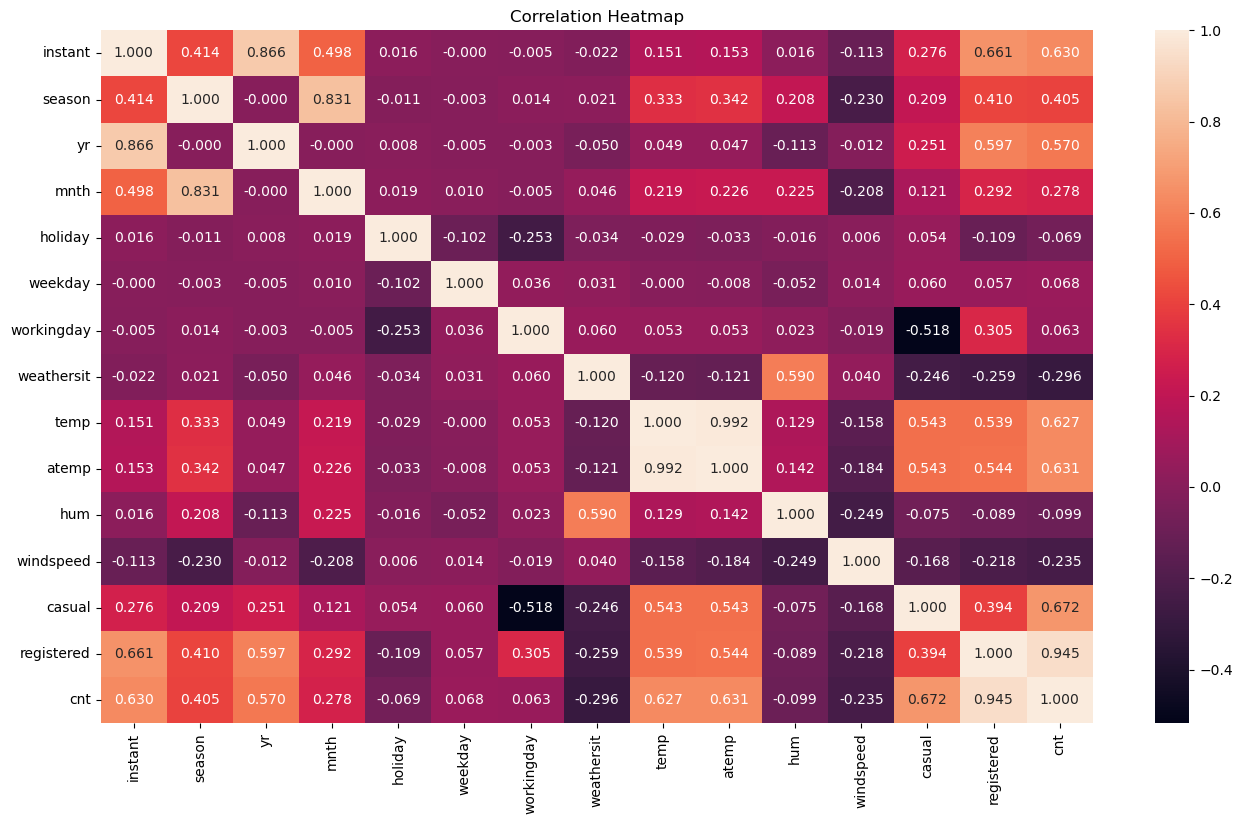

In [24]:
plt.figure(figsize=(16,9))
correlation_data = df.corr(numeric_only=True)
sns.heatmap(correlation_data, annot=True, fmt='.3f')
plt.title("Correlation Heatmap"); plt.show()

`temp` and `atemp` have high correlation so we will remove one of them (`atemp`). We will remove `casual`, `registered`, `instant` and `dteday` as well.

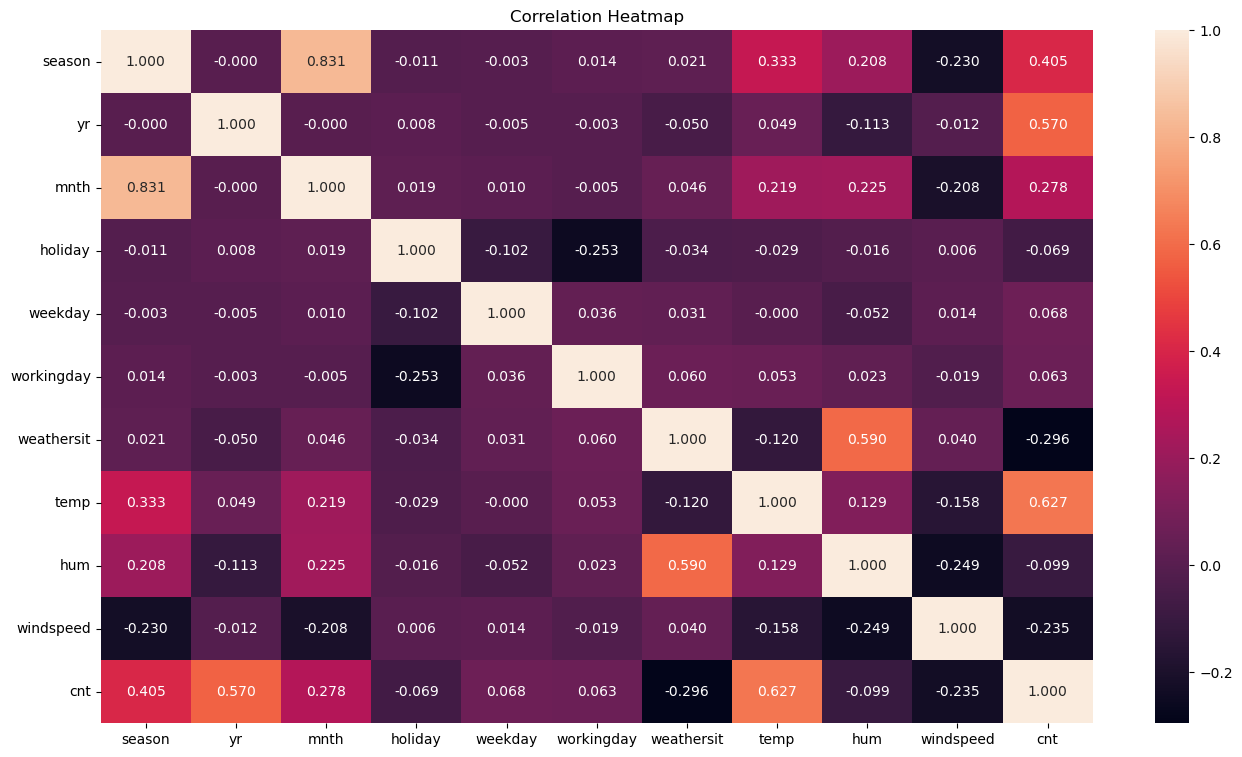

In [25]:
df = df.drop(['atemp', 'casual', 'registered', 'instant', 'dteday'], axis='columns')
plt.figure(figsize=(16,9))
correlation_data = df.corr(numeric_only=True)
sns.heatmap(correlation_data, annot=True, fmt='.3f')
plt.title("Correlation Heatmap"); plt.show()

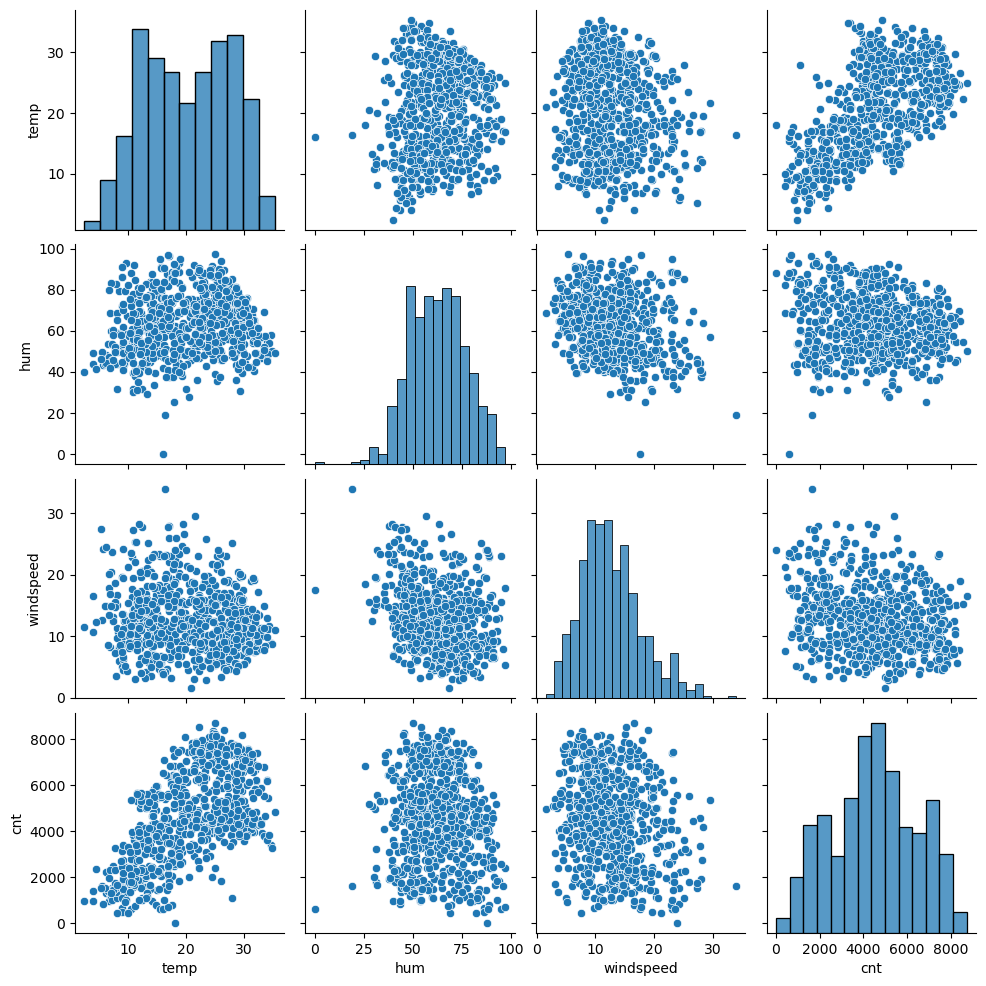

In [26]:
NUMERICAL_COLS = [x for x in NUMERICAL_COLS if x in df.columns]
CATEGORICAL_COLS = [x for x in CATEGORICAL_COLS if x in df.columns]
sns.pairplot(df[NUMERICAL_COLS]); plt.show()

## Data Preprocessing and Preparation

In [27]:
print(CATEGORICAL_COLS, NUMERICAL_COLS)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] ['temp', 'hum', 'windspeed', 'cnt']


For the categorical columns, we will replace some of the columns' values with names instead to later convert to _one-hot_ encoding. One-hot encoding often gives better results for regression.

In [28]:
DF_OLD = df.copy()
df['season'] = df['season'].replace(SEASON_NAMES)
df['mnth'] = df['mnth'].replace(MONTH_NAMES)
df['weekday'] = df['weekday'].replace(WEEKDAY_NAMES)
df['weathersit'] = df['weathersit'].replace({1: 'A', 2: 'B', 3: 'C'})
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,B,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,0,B,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,A,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,A,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,A,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Sat,1,B,10.420847,65.2917,23.458911,2114
726,Spring,1,Dec,0,Sun,1,B,10.386653,59.0000,10.416557,3095
727,Spring,1,Dec,0,Mon,0,B,10.386653,75.2917,8.333661,1341
728,Spring,1,Dec,0,Tue,0,A,10.489153,48.3333,23.500518,1796


In [29]:
ONEHOT_COLS = ['season', 'mnth', 'weekday', 'weathersit']
for c in ONEHOT_COLS: print(df[c].value_counts(), end="\n\n")

Autumn    188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

Mon    105
Tue    105
Wed    105
Thu    104
Sat    104
Sun    104
Fri    103
Name: weekday, dtype: int64

A    463
B    246
C     21
Name: weathersit, dtype: int64



In [30]:
df_dummies = pd.get_dummies(df[ONEHOT_COLS], drop_first=True)
print(', '.join(df_dummies.columns))
df_dummies

season_Spring, season_Summer, season_Winter, mnth_Aug, mnth_Dec, mnth_Feb, mnth_Jan, mnth_Jul, mnth_Jun, mnth_Mar, mnth_May, mnth_Nov, mnth_Oct, mnth_Sep, weekday_Mon, weekday_Sat, weekday_Sun, weekday_Thu, weekday_Tue, weekday_Wed, weathersit_B, weathersit_C


,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
727,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Notice that some of the columns seem to be missing (No `season_Autumn` for example). This is because it can be indicated by all 0 values in the other options (If all `season_` columns are 0, it implies `season_Autumn` is 1).
One-hot encoding encodes discrete features in the form of Boolean flags (0 or 1).

In [31]:
#Attach these one-hot encoded values to the numerical features
df = pd.concat([df_dummies, df.drop(ONEHOT_COLS, axis='columns')], axis='columns')
print(', '.join(df.columns))
df

season_Spring, season_Summer, season_Winter, mnth_Aug, mnth_Dec, mnth_Feb, mnth_Jan, mnth_Jul, mnth_Jun, mnth_Mar, mnth_May, mnth_Nov, mnth_Oct, mnth_Sep, weekday_Mon, weekday_Sat, weekday_Sun, weekday_Thu, weekday_Tue, weekday_Wed, weathersit_B, weathersit_C, yr, holiday, workingday, temp, hum, windspeed, cnt


,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wed,weathersit_B,weathersit_C,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,10.420847,65.2917,23.458911,2114
726,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,10.386653,59.0000,10.416557,3095
727,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,10.386653,75.2917,8.333661,1341
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,10.489153,48.3333,23.500518,1796


## Building and Evaluating Models

In [32]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=RANDOM_SEED)
print(len(df_train), len(df_test))

511 219


In [33]:
#Apply MinMaxScaler to NUMERICAL_COLS
mms = MinMaxScaler()
df_train[NUMERICAL_COLS] = mms.fit_transform(df_train[NUMERICAL_COLS])
df_train[NUMERICAL_COLS]

,temp,hum,windspeed,cnt
508,0.729898,0.736933,0.310273,0.776346
554,0.802869,0.702656,0.326928,0.753221
239,0.797936,0.577650,0.581909,0.496088
479,0.496828,0.440017,0.198734,0.710308
67,0.260488,0.797344,0.407689,0.215025
...,...,...,...,...
295,0.424946,0.762211,0.158989,0.501496
305,0.367222,0.739075,0.123075,0.479061
320,0.320391,0.592116,0.583358,0.348711
400,0.221280,0.707370,0.316663,0.336516


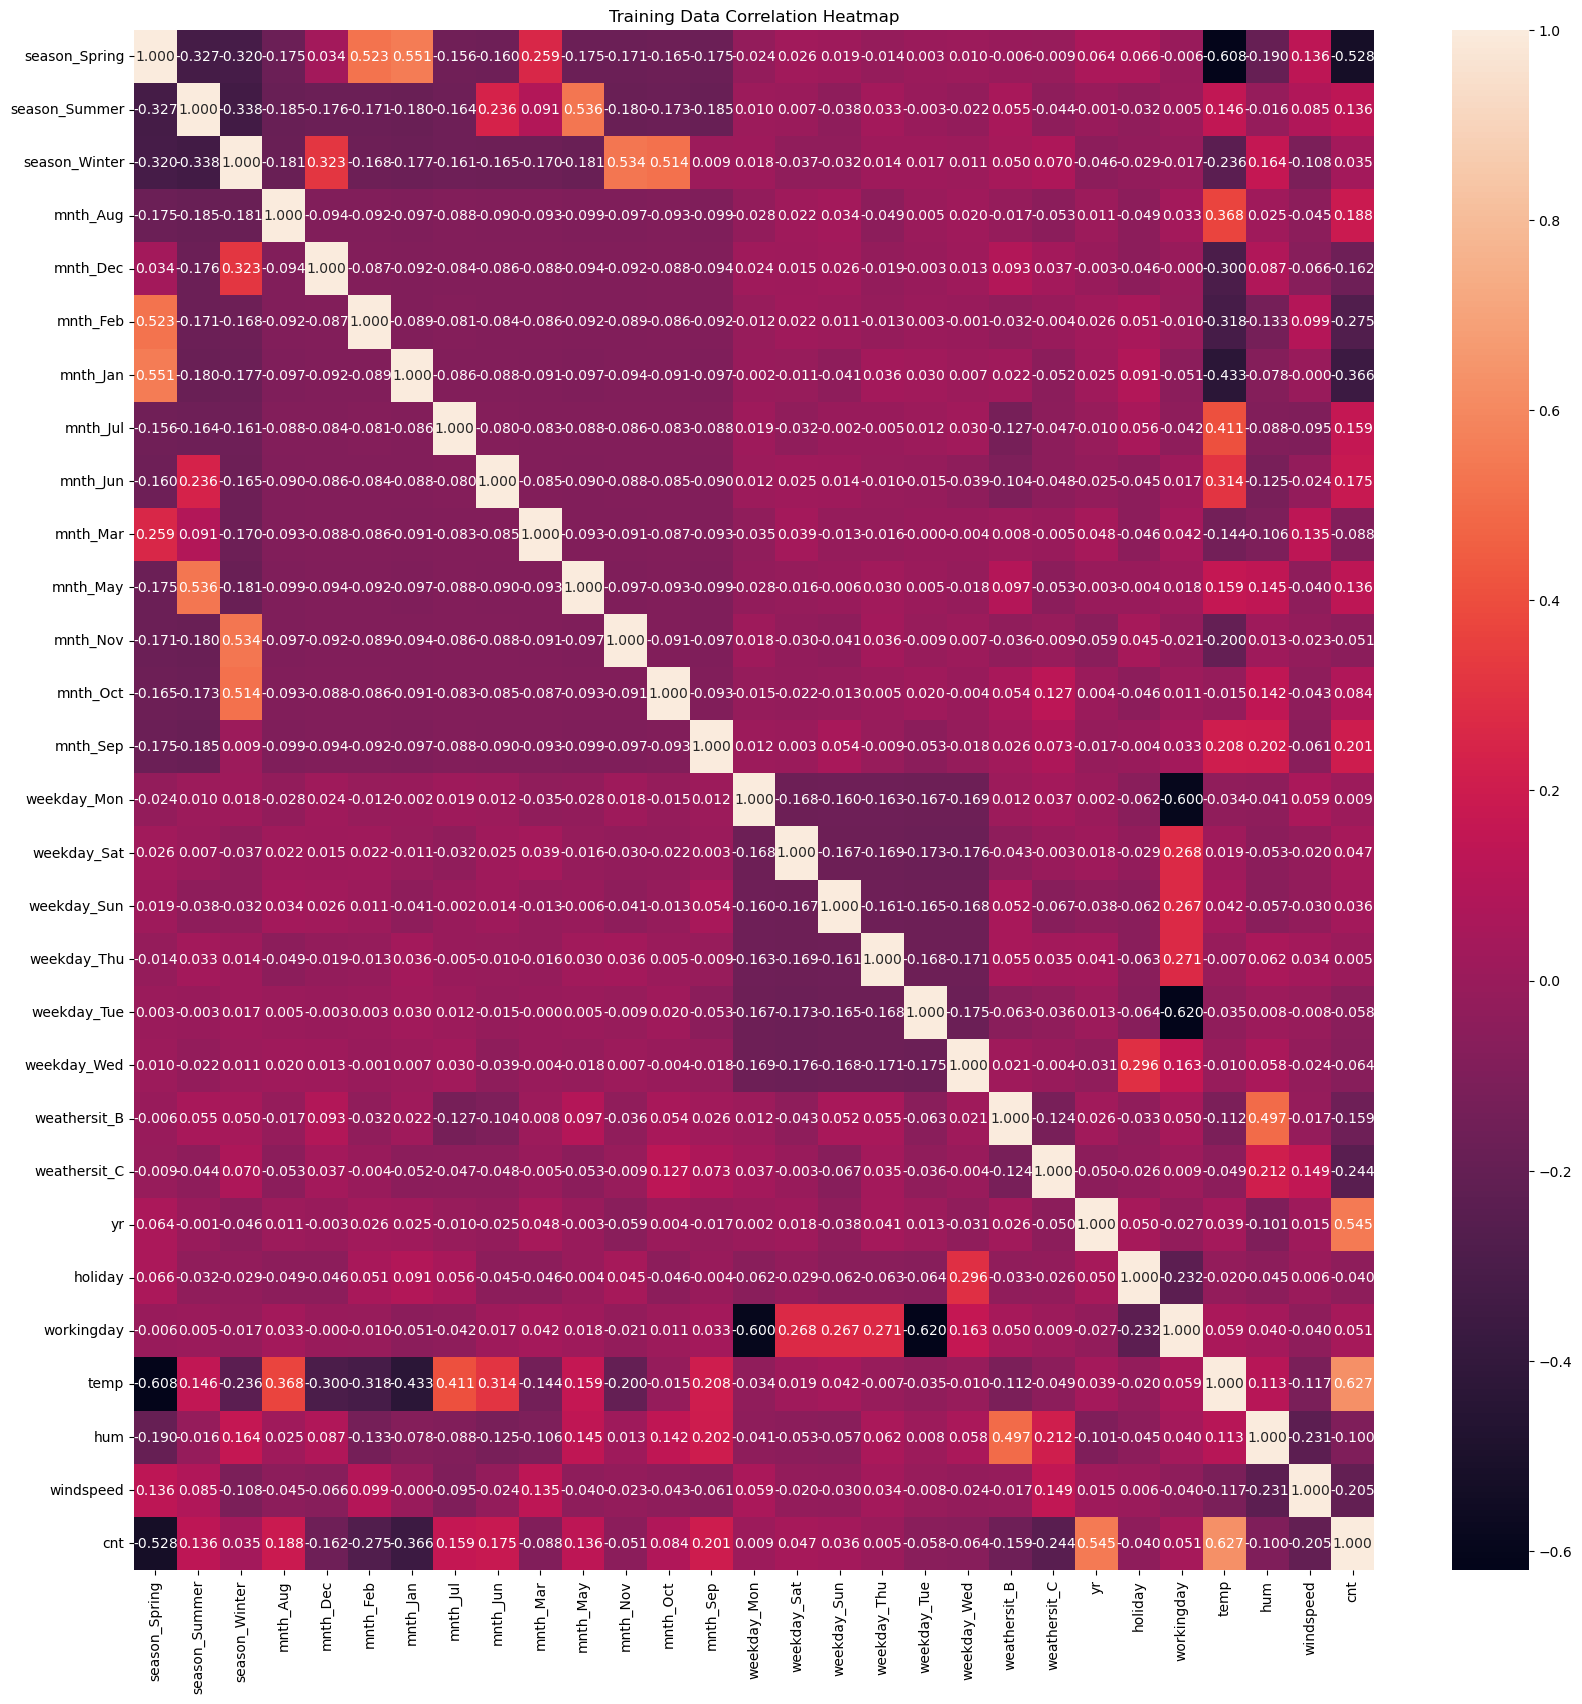

In [34]:
plt.figure(figsize=(20, 20))
correlation_data = df_train.corr(numeric_only=True)
sns.heatmap(correlation_data, annot=True, fmt='.3f')
plt.title("Training Data Correlation Heatmap"); plt.show()

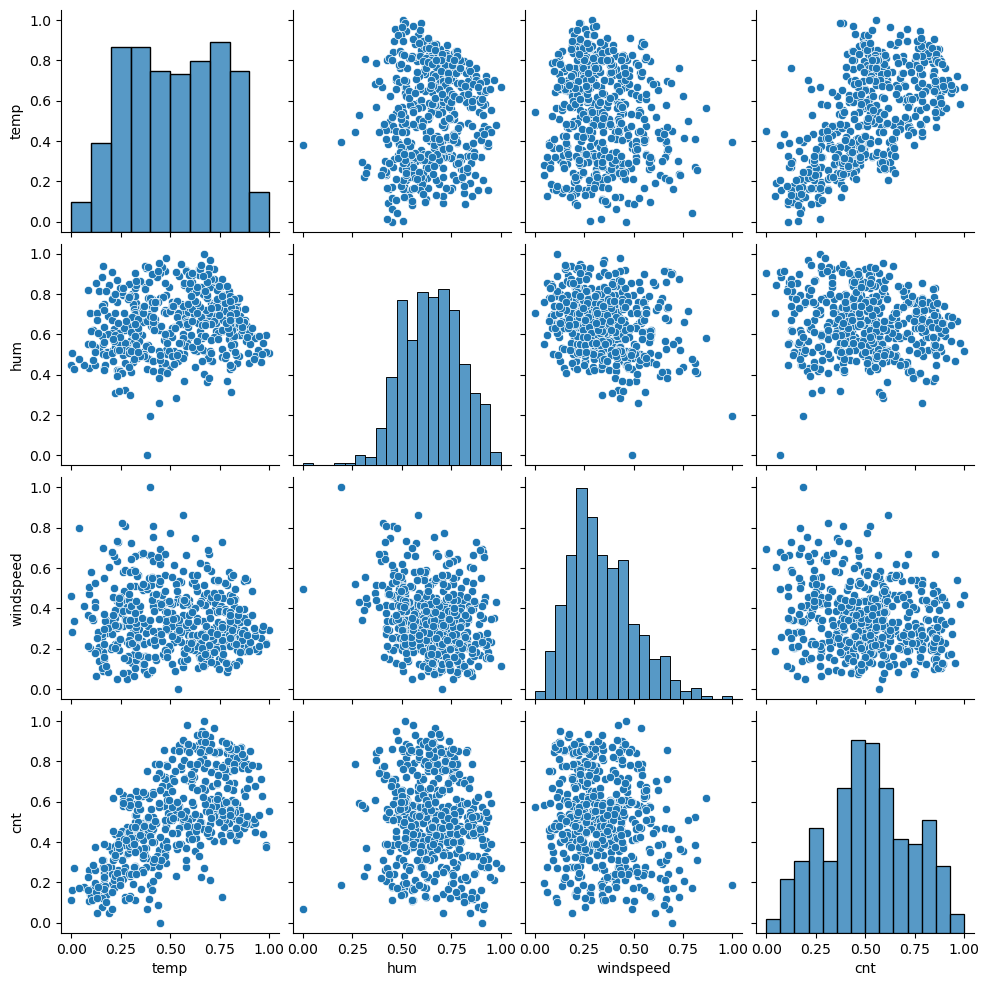

In [35]:
sns.pairplot(df_train[NUMERICAL_COLS]); plt.show()

In [36]:
X_train = df_train.drop(['cnt'], axis='columns'); X_train

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C,yr,holiday,workingday,temp,hum,windspeed
508,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0.729898,0.736933,0.310273
554,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0.802869,0.702656,0.326928
239,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.797936,0.577650,0.581909
479,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0.496828,0.440017,0.198734
67,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0.260488,0.797344,0.407689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.424946,0.762211,0.158989
305,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.367222,0.739075,0.123075
320,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.320391,0.592116,0.583358
400,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0.221280,0.707370,0.316663


In [37]:
Y_train = df_train['cnt']; Y_train

508    0.776346
554    0.753221
239    0.496088
479    0.710308
67     0.215025
         ...   
295    0.501496
305    0.479061
320    0.348711
400    0.336516
642    0.935803
Name: cnt, Length: 511, dtype: float64

In [38]:
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(Y_train, X_train_lm).fit() #Ordinary Least Squares
lr.params

const            0.323196
season_Spring   -0.093741
season_Summer   -0.005671
season_Winter    0.078428
mnth_Aug        -0.015647
mnth_Dec        -0.062309
mnth_Feb        -0.047578
mnth_Jan        -0.074709
mnth_Jul        -0.063270
mnth_Jun        -0.010887
mnth_Mar         0.000360
mnth_May         0.041629
mnth_Nov        -0.058371
mnth_Oct        -0.004591
mnth_Sep         0.061706
weekday_Mon      0.111112
weekday_Sat      0.007150
weekday_Sun      0.006163
weekday_Thu     -0.000576
weekday_Tue      0.064010
weekday_Wed     -0.014336
weathersit_B    -0.052915
weathersit_C    -0.256157
yr               0.230750
holiday          0.047996
workingday       0.100078
temp             0.390232
hum             -0.179651
windspeed       -0.168571
dtype: float64

In [39]:
lm = LinearRegression(n_jobs=-1)
lm.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [40]:
print(lm.coef_) #Yes the ending underscores are necessary
print(lm.intercept_)

[-9.37414069e-02 -1.01582098e-02  8.91392815e-02 -1.86023974e-02
 -6.63699632e-02 -4.78144064e-02 -7.46122697e-02 -7.70700879e-02
 -2.18817320e-02 -2.42878906e-03  4.88309530e-02 -6.38693405e-02
 -2.08269735e-02  5.03959621e-02 -1.27430497e+13  9.50695926e-03
  4.13911329e-03 -1.03806328e-02 -1.27430497e+13 -1.40129641e-02
 -5.01699453e-02 -2.40443268e-01  2.30897768e-01 -1.27430497e+13
 -1.27430497e+13  4.00435097e-01 -1.88906466e-01 -1.67508118e-01]
12743049741219.969


In [41]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     94.83
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          5.13e-174
Time:                        18:05:03   Log-Likelihood:                 526.41
No. Observations:                 511   AIC:                            -996.8
Df Residuals:                     483   BIC:                            -878.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3232      0.035      9.217      0.000       0.254       0.392
season_Spring    -0.0937      0.030     -3.140      0.002      -0.152      -0.035
season_Summer    -0.0057      0.026     -0.220      0.826      -0.056       0.045
season_Winter     0.0784      0.026      3.029      0.003       0.028       0.129
mnth_Aug         -0.0156      0.033     -0.473      0.637      -0.081       0.049
mnth_Dec         -0.0623      0.034     -1.806      0.071      -0.130       0.005
mnth_Feb         -0.0476      0.033     -1.424      0.155      -0.113       0.018
mnth_Jan         -0.0747      0.035     -2.156      0.032      -0.143      -0.007
mnth_Jul         -0.0633      0.035     -1.818      0.070      -0.132       0.005
mnth_Jun         -0.0109      0.025     -0.441      0.659      -0.059       0.038
mnth_Mar          0.0004      0.025      0.014      0.989      -0.049       0.049
mnth_May          0.0416      0.020      2.082      0.038       0.002       0.081
mnth_Nov         -0.0584      0.036     -1.607      0.109      -0.130       0.013
mnth_Oct         -0.0046      0.036     -0.128      0.898      -0.075       0.066
mnth_Sep          0.0617      0.031      1.978      0.049       0.000       0.123
weekday_Mon       0.1111      0.014      8.051      0.000       0.084       0.138
weekday_Sat       0.0071      0.015      0.483      0.629      -0.022       0.036
weekday_Sun       0.0062      0.015      0.404      0.686      -0.024       0.036
weekday_Thu      -0.0006      0.015     -0.038      0.969      -0.030       0.029
weekday_Tue       0.0640      0.014      4.635      0.000       0.037       0.091
weekday_Wed      -0.0143      0.015     -0.949      0.343      -0.044       0.015
weathersit_B     -0.0529      0.011     -4.978      0.000      -0.074      -0.032
weathersit_C     -0.2562      0.027     -9.404      0.000      -0.310      -0.203
yr                0.2307      0.008     28.292      0.000       0.215       0.247
holiday           0.0480      0.025      1.937      0.053      -0.001       0.097
workingday        0.1001      0.013      7.972      0.000       0.075       0.125
temp              0.3902      0.045      8.698      0.000       0.302       0.478
hum              -0.1797      0.038     -4.672      0.000      -0.255      -0.104
windspeed        -0.1686      0.027     -6.321      0.000      -0.221      -0.116
==============================================================================
Omnibus:                      102.533   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.056
Skew:                          -0.982   Prob(JB):                     1.14e-60
Kurtosis:                       6.018   Cond. No.                     2.15e+15
================================================================

Adjusted R<sup>2</sup> value is 83%. Next we will try to reduce the number of features to see if we can't maintain similar adjusted R<sup>2</sup> values or not.

In [42]:
print("Number of features:", len(X_train.columns))

Number of features: 28


### Reducing Number of Features (using recursive feature elimination)

In [43]:
lm1 = LinearRegression(n_jobs=-1)
rfe1 = RFE(lm1, n_features_to_select=15)
rfe1.fit(X_train, Y_train)

print(rfe1.support_)
print(rfe1.ranking_)
col1 = X_train.columns[rfe1.support_]
print(col1)

[ True False  True False False False False  True False False  True False
 False  True  True False False False  True False  True  True  True  True
  True  True  True  True]
[ 1 11  1  8  4  5  2  1  9 14  1  3 10  1  1  6  7 12  1 13  1  1  1  1
  1  1  1  1]
Index(['season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_May', 'mnth_Sep',
       'weekday_Mon', 'weekday_Tue', 'weathersit_B', 'weathersit_C', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')


In [44]:
X_train_rfe1 = X_train[col1]

X_train_rfe1_lm = sm.add_constant(X_train_rfe1)
lr1 = sm.OLS(Y_train, X_train_rfe1_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     178.1
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          4.02e-183
Time:                        18:05:03   Log-Likelihood:                 515.06
No. Observations:                 511   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -936.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2895      0.025     11.588      0.000       0.240       0.339
season_Spring    -0.1108      0.015     -7.170      0.000      -0.141      -0.080
season_Winter     0.0652      0.013      5.167      0.000       0.040       0.090
mnth_Jul         -0.0611      0.018     -3.430      0.001      -0.096      -0.026
mnth_May          0.0508      0.015      3.313      0.001       0.021       0.081
mnth_Sep          0.0791      0.015      5.279      0.000       0.050       0.109
weekday_Mon       0.1067      0.012      9.161      0.000       0.084       0.130
weekday_Tue       0.0622      0.012      5.215      0.000       0.039       0.086
weathersit_B     -0.0482      0.011     -4.561      0.000      -0.069      -0.027
weathersit_C     -0.2421      0.027     -8.946      0.000      -0.295      -0.189
yr                0.2307      0.008     28.458      0.000       0.215       0.247
holiday           0.0237      0.022      1.080      0.281      -0.019       0.067
workingday        0.0969      0.009     10.269      0.000       0.078       0.115
temp              0.4422      0.029     15.142      0.000       0.385       0.500
hum              -0.2028      0.037     -5.446      0.000      -0.276      -0.130
windspeed        -0.1588      0.026     -6.009      0.000      -0.211      -0.107
==============================================================================
Omnibus:                       75.639   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.410
Skew:                          -0.795   Prob(JB):                     2.69e-37
Kurtosis:                       5.320   Cond. No.                     2.03e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.63e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Adjusted R<sup>2</sup> value is 82%. Still quite good (the eliminated features are not really needed for our model) 

### Evaluating Variance Inflation Factors

In [45]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(len(X_train_rfe1.columns))]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
11,workingday,41.591
6,weekday_Tue,9.731
5,weekday_Mon,8.815
12,temp,3.016
0,season_Spring,2.747
10,holiday,2.403
13,hum,1.928
1,season_Winter,1.891
7,weathersit_B,1.620
2,mnth_Jul,1.355


In [46]:
lm2 = LinearRegression(n_jobs=-1)
rfe2 = RFE(lm2, n_features_to_select=7)
rfe2.fit(X_train, Y_train)

print(rfe2.support_)
print(rfe2.ranking_)
col2 = X_train.columns[rfe2.support_]
print(col2)

X_train_rfe2 = X_train[col2]
X_train_rfe2_lm = sm.add_constant(X_train_rfe2)
lr2 = sm.OLS(Y_train, X_train_rfe2_lm).fit()
lr2.summary()

[ True False False False False False False False False False False False
 False False False False False False False False False  True  True  True
 False  True  True  True]
[ 1 19  7 16 12 13 10  6 17 22  8 11 18  5  2 14 15 20  4 21  9  1  1  1
  3  1  1  1]
Index(['season_Spring', 'weathersit_C', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     278.9
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          1.16e-168
Time:                        18:05:03   Log-Likelihood:                 461.21
No. Observations:                 511   AIC:                            -906.4
Df Residuals:                     503   BIC:                            -872.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4644      0.030     15.624      0.000       0.406       0.523
season_Spring    -0.1669      0.013    -12.620      0.000      -0.193      -0.141
weathersit_C     -0.1973      0.028     -7.018      0.000      -0.253      -0.142
yr                0.2304      0.009     26.014      0.000       0.213       0.248
holiday          -0.0682      0.029     -2.352      0.019      -0.125      -0.011
temp              0.3688      0.024     15.660      0.000       0.323       0.415
hum              -0.2293      0.032     -7.165      0.000      -0.292      -0.166
windspeed        -0.1809      0.028     -6.352      0.000      -0.237      -0.125
==============================================================================
Omnibus:                       49.433   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.862
Skew:                          -0.650   Prob(JB):                     7.50e-18
Kurtosis:                       4.420   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adjusted R<sup>2</sup> value is 79%. 

In [47]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(len(X_train_rfe2.columns))]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
6,windspeed,9.731
5,hum,8.815
0,season_Spring,2.747
1,weathersit_C,1.891
2,yr,1.355
3,holiday,1.225
4,temp,1.170


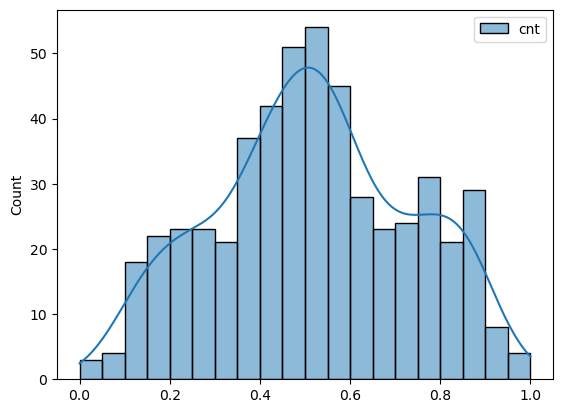

In [48]:
Y_train_pred = lr2.predict(X_train_rfe2_lm)
sns.histplot((Y_train, Y_train_pred), bins=20, kde=True)
plt.show()

In [49]:
df_test[NUMERICAL_COLS] = mms.transform(df_test[NUMERICAL_COLS])
df_test[NUMERICAL_COLS]

,temp,hum,windspeed,cnt
139,0.575244,0.739931,0.211559,0.563162
672,0.299696,0.547987,0.323079,0.585021
608,0.858414,0.656384,0.187179,0.703866
77,0.491382,0.389889,0.712834,0.356075
215,0.801780,0.778920,0.360273,0.523930
...,...,...,...,...
518,0.661284,0.507283,0.333343,0.876553
284,0.583956,0.931877,0.465413,0.275426
115,0.699403,0.749786,0.626935,0.503682
224,0.770195,0.750214,0.389762,0.474919


In [50]:
X_test = df_test.drop(['cnt'], axis='columns'); X_test

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C,yr,holiday,workingday,temp,hum,windspeed
139,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.575244,0.739931,0.211559
672,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0.299696,0.547987,0.323079
608,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0.858414,0.656384,0.187179
77,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.491382,0.389889,0.712834
215,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.801780,0.778920,0.360273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0.661284,0.507283,0.333343
284,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.583956,0.931877,0.465413
115,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.699403,0.749786,0.626935
224,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.770195,0.750214,0.389762


In [51]:
Y_test = df_test['cnt']; Y_test

139    0.563162
672    0.585021
608    0.703866
77     0.356075
215    0.523930
         ...   
518    0.876553
284    0.275426
115    0.503682
224    0.474919
572    0.791763
Name: cnt, Length: 219, dtype: float64

In [52]:
X_test_rfe2 = X_test[X_train_rfe2.columns]; X_test_rfe2

,season_Spring,weathersit_C,yr,holiday,temp,hum,windspeed
139,0,0,0,0,0.575244,0.739931,0.211559
672,0,0,1,0,0.299696,0.547987,0.323079
608,0,0,1,0,0.858414,0.656384,0.187179
77,1,0,0,0,0.491382,0.389889,0.712834
215,0,0,0,0,0.801780,0.778920,0.360273
...,...,...,...,...,...,...,...
518,0,0,1,0,0.661284,0.507283,0.333343
284,0,1,0,0,0.583956,0.931877,0.465413
115,0,0,0,0,0.699403,0.749786,0.626935
224,0,0,0,0,0.770195,0.750214,0.389762


In [53]:
X_test_rfe2_lm = sm.add_constant(X_test_rfe2)
X_test_rfe2_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 139 to 572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   season_Spring  219 non-null    uint8  
 2   weathersit_C   219 non-null    uint8  
 3   yr             219 non-null    int64  
 4   holiday        219 non-null    int64  
 5   temp           219 non-null    float64
 6   hum            219 non-null    float64
 7   windspeed      219 non-null    float64
dtypes: float64(4), int64(2), uint8(2)
memory usage: 12.4 KB


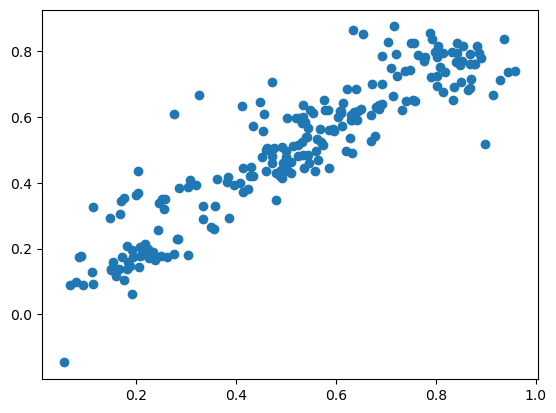

In [54]:
Y_test_pred = lr2.predict(X_test_rfe2_lm)
plt.scatter(Y_test, Y_test_pred)
plt.show()

In [55]:
r2_score(Y_test, Y_test_pred)

0.8255010048759718

Quite good performance

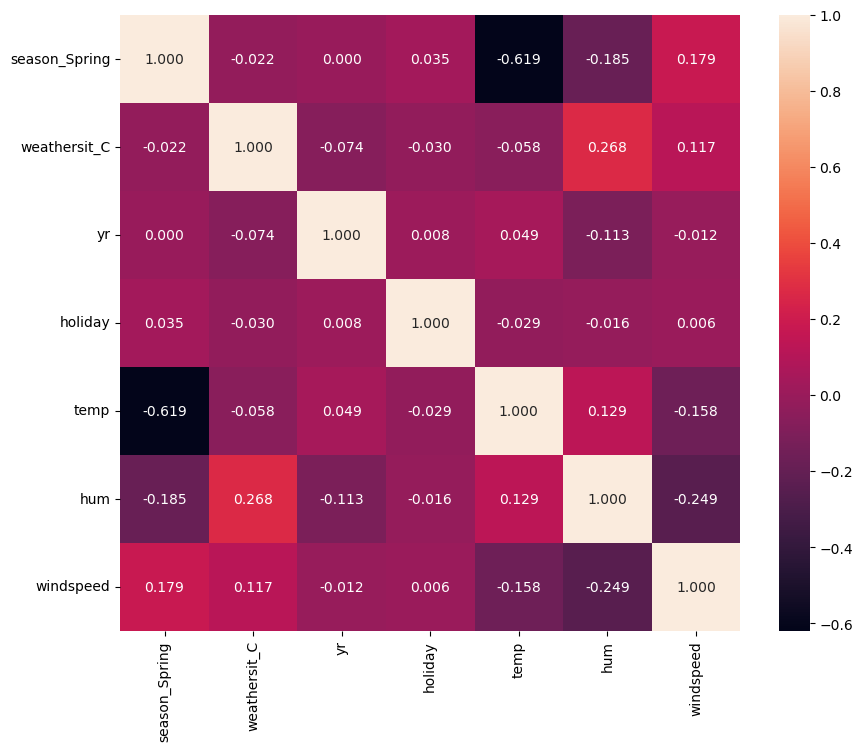

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df[X_test_rfe2.columns].corr(), fmt=".3f", annot=True)
plt.show()